# solving job shop scheduling problem with GA

- la40  
http://jobshop.jjvh.nl/

https://github.com/Eason0227/Job-shop-scheduling-problem/blob/main/GA%20for%20JSSP.ipynb


# Confirm module behavior

100% 500/500 [00:20<00:00, 24.22it/s]


optimal solution [1, 8, 6, 0, 4, 1, 0, 9, 0, 8, 9, 6, 1, 2, 4, 7, 0, 5, 4, 7, 5, 5, 6, 0, 8, 2, 7, 0, 5, 7, 9, 3, 4, 3, 1, 0, 8, 1, 4, 6, 9, 5, 5, 7, 8, 4, 3, 1, 9, 6, 2, 3, 0, 2, 8, 4, 3, 9, 0, 8, 3, 3, 5, 6, 7, 8, 3, 0, 2, 1, 2, 3, 4, 7, 2, 2, 8, 6, 5, 1, 1, 4, 2, 7, 9, 5, 6, 7, 9, 9, 7, 9, 5, 3, 4, 1, 2, 6, 6, 8]
optimal makespan: 774


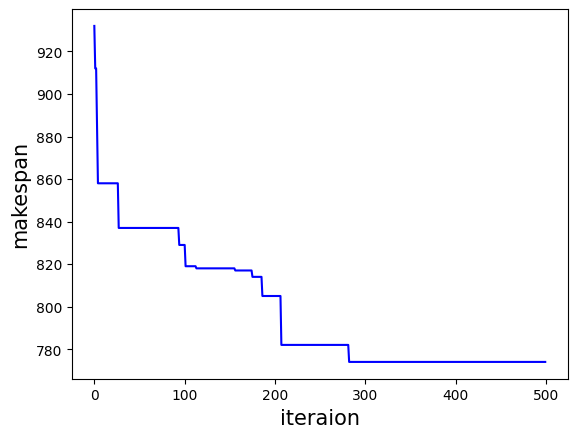

In [1]:
import os
import time
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
import plotly.figure_factory as ff
from genetic_algorithm import GA
from visualize import format_gannt_data, prepare_gannt_data_from

# APP_ROOT_DIR: Path = Path(os.path.abspath(__file__)).parents[1]

if __name__ == "__main__":
    # processing_df = pd.read_csv(
    #     os.path.join(APP_ROOT_DIR, "notebooks/data/jssp/Processing_time.csv")
    # )
    # sequence_df = pd.read_csv(
    #     os.path.join(APP_ROOT_DIR, "notebooks/data/jssp/Machine_sequence.csv")
    # )
    processing_df= pd.read_csv("data/jssp/Processing_time.csv")
    sequence_df = pd.read_csv("data/jssp/Machine_sequence.csv")
    
    processing_df = processing_df.drop(["Job"], axis=1)
    sequence_df = sequence_df.drop(["Job"], axis=1)

    num_machine = processing_df.shape[0]  # number of machines
    num_job = processing_df.shape[1]  # number of jobs
    num_gene = num_machine * num_job  # number of genes in a chromosome

    # processing_times
    proc_time = [list(map(int, processing_df.iloc[i])) for i in range(num_job)]

    # 機械タイプ
    # machine_sequences for tasks
    machine_type_seq: list[list[int]] = [
        list(map(int, sequence_df.iloc[i])) for i in range(num_job)
    ]

    # 機械タイプごとの、機械数
    machine_num_per_type: list[int] = [3, 4, 2, 1, 2, 1, 1, 3, 3, 2]

    # parameter
    population_size = 100
    num_iteration = 500  # 2000
    crossover_rate = 0.9
    mutation_rate = 0.1
    mutation_selection_rate = 0.1
    num_mutation_jobs = round(num_gene * mutation_selection_rate)

    start_time = time.time()

    # Genetic_Algorithm
    ga = GA(
        population_size=population_size,
        num_job=num_job,
        num_machine=num_machine,
        num_gene=num_gene,
        proc_time=proc_time,
        machine_type_seq=machine_type_seq,
        machine_num_per_type=machine_num_per_type,
    )

    ga.run(
        num_iteration=num_iteration,
        crossover_rate=crossover_rate,
        mutation_rate=mutation_rate,
        mutation_selection_rate=mutation_selection_rate,
    )

    """----------result----------"""
    result = ga.results[-1]
    # Genetic_Algorithm()
    print("optimal solution", result["sequence_best"])
    print("optimal makespan:", result["best_make_span"])

    plt.plot([i for i in range(len(result["makespan_record"]))], result["makespan_record"], "b")
    plt.ylabel("makespan", fontsize=15)
    plt.xlabel("iteraion", fontsize=15)
    plt.show()



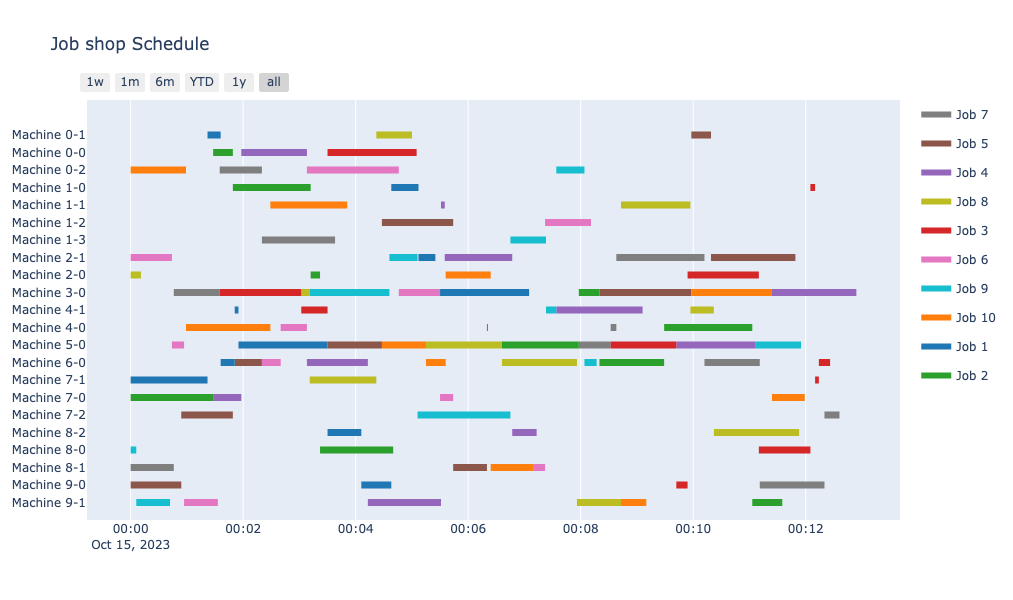

In [2]:

"""----------visualize----------"""
m_keys = [j for j in range(num_machine)]
j_keys = [j for j in range(num_job)]

time4machine, j_record = prepare_gannt_data_from(
    machine_num_per_type,
    proc_time,
    machine_type_seq,
    m_keys,
    j_keys,
    result["sequence_best"],
)

frame_dicts: list[dict] = format_gannt_data(
    machine_num_per_type, m_keys, j_keys, j_record
)
fig = ff.create_gantt(
    frame_dicts,
    index_col="Resource",
    show_colorbar=True,
    group_tasks=True,
    showgrid_x=True,
    title="Job shop Schedule",
)
# iplot(fig, filename="GA_job_shop_scheduling")
fig


In [12]:
!pip install kaleido==0.2.1

  0%|          | 0/45 [00:00<?, ?it/s]

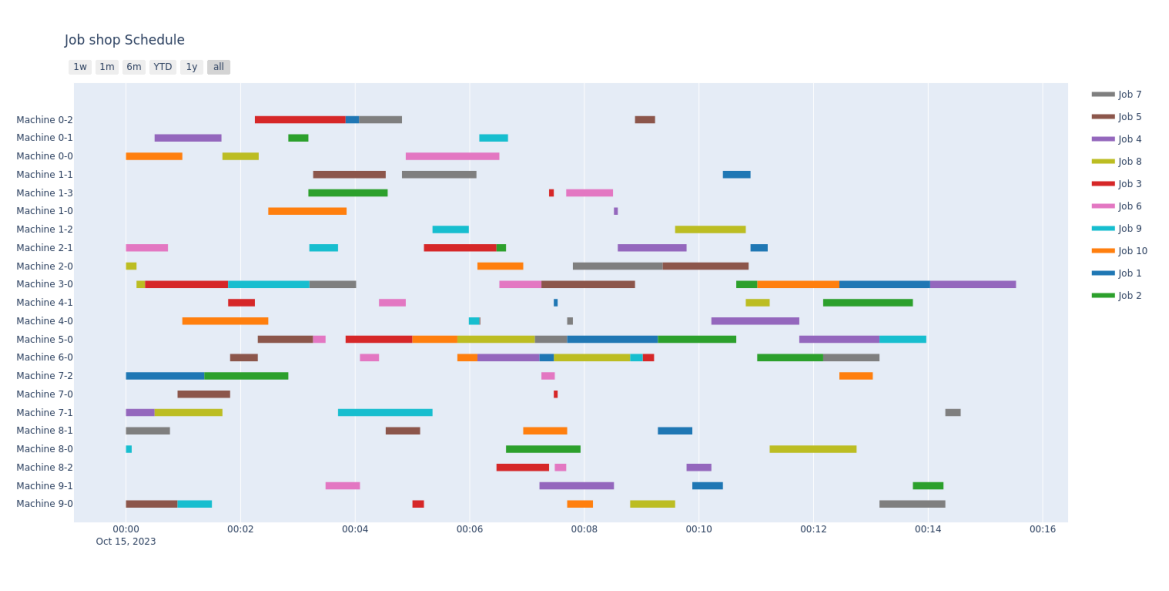

In [6]:
import io
import numpy as np
import plotly
from PIL import Image
from parapara import play_anim
from tqdm.notebook import tqdm

def plotly_fig2array(fig: plotly.graph_objs.Figure, width: int, height: int):
    # convert Plotly fig to an array
    if (width is not None) and (height is not None):
        fig_bytes = fig.to_image(format="png", width=width, height=height)
    else:
        fig_bytes = fig.to_image(format="png")
    buf = io.BytesIO(fig_bytes)
    img = Image.open(buf)
    return np.asarray(img)


numpy_frames = []
# best_gene_history.append(result["sequence_best"])
for chromosome in tqdm(result["best_chromosome_history"]):
    _, j_record_ = prepare_gannt_data_from(
        machine_num_per_type,
        proc_time,
        machine_type_seq,
        m_keys, j_keys, chromosome
    )
    frame_dicts_: list[dict] = format_gannt_data(
        machine_num_per_type, m_keys, j_keys, j_record_
    )
    fig_ = ff.create_gantt(
        frame_dicts_, index_col="Resource",
        show_colorbar=True, group_tasks=True, showgrid_x=True, title="Job shop Schedule"
    )
    numpy_array = plotly_fig2array(fig_, 1500, 750)
    numpy_frames.append(numpy_array)

play_anim(numpy_frames)
